In [1]:
import numpy as np  
from keras.layers import Input, Dense
from keras.models import Model
from keras.models import load_model

from processing_functions import * 

import os
os.chdir('../') # Go to the parent folder
from support_functions import *
os.chdir('Synthetic')

Using TensorFlow backend.


## Parameters

In [2]:
k = 50 # Define the k parameter for the precision at k
model_path = 'model_autoencoder.h5'

## Read Data

In [3]:
data, labels, data_train, data_test, labels_train, labels_test = read_data()

## Implement the Anomaly Detection¶with the Construction Error

/home/ivan/anaconda3/lib/python3.6/site-packages/keras/models.py:281: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


Below is a summery of the autoencoder model: 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                204       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                208       
Total params: 624
Trainable params: 624
Non-trainable params: 0
_________________________________________________________________
None

 The output shape of the autoencoder model: 
(None, 16)
Below are examples of the Reconstruc

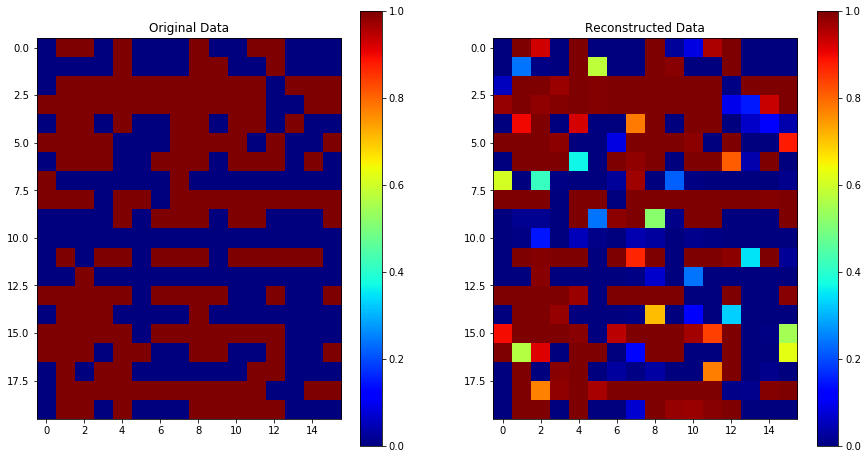

Below is a scatter plot that ranks the data points according to their Reconstruction Errors.
The higher the reconstruction error, the more likely the point will be detected as an anomaly
The Black Points are True Anomalies, while the others are True Normal points


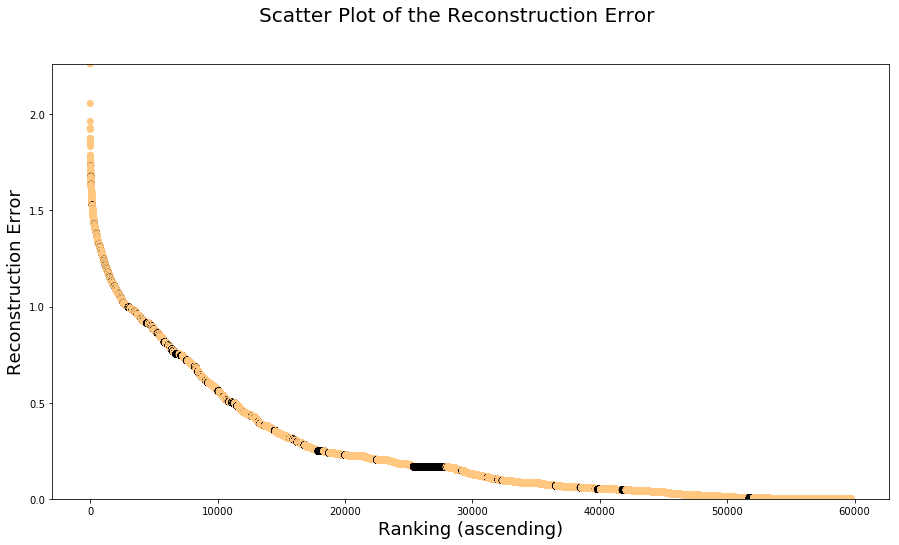


Training Results:
Precision: 20.3%
Recall: 82.7%
F-score: 32.6%
R-Precision (# R = 7048): 16.7%
Precision@50: 2.0%


Testing Results:
Precision: 20.2%
Recall: 83.7%
F-score: 32.6%
R-Precision (# R = 2977): 14.8%
Precision@50: 4.0%



In [4]:
detection_with_autoencoder_reconstruction_error(data_train, data_test,labels_train,labels_test,k,model_path,is_image_data=False,to_print = True)